In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_excel("train_5.xlsx")

In [3]:
df["ABONELIK_SURESI"] = np.datetime64("2021-11-04")
df["ABONELIK_SURESI"] = round((df["ABONELIK_SURESI"] - df.SAYAC_BASLANGIC_TARIHI).dt.days / 30)
df.head()
df['ABONELIK_SURESI'] = df['ABONELIK_SURESI'].fillna(500) 

In [4]:
df_id = pd.DataFrame(df.ABONELIK_SURESI.unique(), columns= ["ABONELIK_SURESI"])
df_id

for i in df.ABONELIK_SURESI.unique():
  df_id.loc[df_id["ABONELIK_SURESI"] == i, ["KACAK_SAYISI"]] = df.loc[df.ABONELIK_SURESI == i].NK_FLAG.sum()
  df_id.loc[df_id["ABONELIK_SURESI"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.ABONELIK_SURESI == i].NK_FLAG)
  df_id.loc[df_id["ABONELIK_SURESI"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id = df_id.sort_values("KACAK_ORANI", ascending=False)
df_id

,ABONELIK_SURESI,KACAK_SAYISI,TOPLAM_ABONE,KACAK_ORANI
44,23.0,34.0,67.0,50.746269
61,24.0,38.0,79.0,48.101266
52,500.0,19.0,50.0,38.000000
9,25.0,26.0,73.0,35.616438
34,29.0,20.0,60.0,33.333333
49,21.0,27.0,92.0,29.347826
46,30.0,18.0,65.0,27.692308
6,31.0,11.0,41.0,26.829268
28,26.0,24.0,91.0,26.373626
43,22.0,41.0,159.0,25.786164


In [5]:
yüzde_0 = []
yüzde_1 = []
yüzde_4 = []
yüzde_8 = []
yüzde_12 = []
yüzde_15 = []
yüzde_16 = []
yüzde_19 = []
yüzde_20 = []
yüzde_21 = []
yüzde_23 = []
yüzde_24 = []
yüzde_25 = []
yüzde_26 = []
yüzde_27 = []
yüzde_28 = []

for i in range(df_id.shape[0]) :
        
    if (df_id.loc[i,'KACAK_ORANI'] < 11.00) & (df_id.loc[i,'KACAK_ORANI'] >= 0.00) :
        yüzde_1.append(df_id.loc[i,'ABONELIK_SURESI'])
        
    elif (df_id.loc[i,'KACAK_ORANI'] < 21.00) & (df_id.loc[i,'KACAK_ORANI'] > 12.75) :
        yüzde_16.append(df_id.loc[i,'ABONELIK_SURESI'])
           
    elif (df_id.loc[i,'KACAK_ORANI'] < 30.00) & (df_id.loc[i,'KACAK_ORANI'] > 22.50) :
        yüzde_21.append(df_id.loc[i,'ABONELIK_SURESI'])
    
    elif (df_id.loc[i,'KACAK_ORANI'] < 38.50) & (df_id.loc[i,'KACAK_ORANI'] > 31.00) :
        yüzde_23.append(df_id.loc[i,'ABONELIK_SURESI'])
        
    elif (df_id.loc[i,'KACAK_ORANI'] < 51.00) & (df_id.loc[i,'KACAK_ORANI'] > 38.50) :
        yüzde_25.append(df_id.loc[i,'ABONELIK_SURESI'])


for i in range(df.shape[0]) :
    
    if df.loc[i,'ABONELIK_SURESI'] in yüzde_1  :
        df.loc[i,'ABONELIK_SURESI'] = 'yüzde_1'
        
    elif df.loc[i,'ABONELIK_SURESI'] in yüzde_16  :
        df.loc[i,'ABONELIK_SURESI'] = 'yüzde_16'
        
    elif df.loc[i,'ABONELIK_SURESI'] in yüzde_21  :
        df.loc[i,'ABONELIK_SURESI'] = 'yüzde_21'
        
    elif df.loc[i,'ABONELIK_SURESI'] in yüzde_23  :
        df.loc[i,'ABONELIK_SURESI'] = 'yüzde_23'
        
    elif df.loc[i,'ABONELIK_SURESI'] in yüzde_25  :
        df.loc[i,'ABONELIK_SURESI'] = 'yüzde_25'
     

bin_labels = ['0-40', '41-50', '51-70', '70 üzeri','EKSIK']
bins = [0, 40, 50, 70, 200, 501]
df['ABONELIK_SURESI_group'] = pd.cut(df['ABONELIK_SURESI'], bins = bins, labels = bin_labels, include_lowest = True)
#df.loc[df.ABONELIK_SURESI==71.0,["ABONELIK_SURESI",'ABONELIK_SURESI_group']]

In [6]:
df_id = pd.DataFrame(df.SAYAC_MODEL.unique(), columns= ["SAYAC_MODEL"])
df_id

for i in df.SAYAC_MODEL.unique():
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["KACAK_SAYISI"]] = df.loc[df.SAYAC_MODEL == i].NK_FLAG.sum()
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.SAYAC_MODEL == i].NK_FLAG)
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id.sort_values("KACAK_SAYISI", ascending=False)

,SAYAC_MODEL,KACAK_SAYISI,TOPLAM_ABONE,KACAK_ORANI
4,LUN10-B,462.0,2261.0,20.433437
3,LUN10,128.0,2240.0,5.714286
1,EC058MBW,113.0,3447.0,3.278213
7,EC058MCT,63.0,791.0,7.964602
6,VEM-M580DB0E,42.0,906.0,4.635762
11,LSM-35,33.0,401.0,8.229426
0,LUN1,33.0,1479.0,2.231237
5,EC018MBW,17.0,794.0,2.141058
12,AEL.MF.07,12.0,425.0,2.823529
45,LSM10-BUZ,11.0,11.0,100.000000


***

In [7]:
(df.SAYAC_BASLANGIC_TARIHI == df.SAYAC_TAKILMA_TARIHI).sum()


14950

In [8]:
df[df.SAYAC_BASLANGIC_TARIHI == df.SAYAC_TAKILMA_TARIHI].NK_FLAG.value_counts()

0    13949
1     1001
Name: NK_FLAG, dtype: int64

In [9]:
df[df.SAYAC_BASLANGIC_TARIHI != df.SAYAC_TAKILMA_TARIHI].NK_FLAG.value_counts()

0    31
1    19
Name: NK_FLAG, dtype: int64

In [10]:
eksik_df = df[df.SAYAC_BASLANGIC_TARIHI != df.SAYAC_TAKILMA_TARIHI]


In [11]:
df.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,SAYAC_BITIS_TARIHI,SAYAC_MARKA,SAYAC_MODEL,SAYAC_MALZEME_ID,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_TAKILMA_TARIHI,SAYAC_YAPIM_YILI,NK_FLAG,ABONELIK_SURESI
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,9999-12-31 00:00:00,LUNA,LUN1,80000100.0,Aktif,Monofaze,2016-10-18,2012.0,0,yüzde_1
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,9999-12-31 00:00:00,ELEKTROMED,EC058MBW,80000730.0,Aktif,Monofaze,2016-09-25,2015.0,0,yüzde_1
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,9999-12-31 00:00:00,ELEKTROMED,EC15ATBW,80000730.0,Aktif,Trifaze,2016-10-11,2016.0,0,yüzde_1
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,9999-12-31 00:00:00,LUNA,LUN10,80000710.0,Aktif,Monofaze,2016-05-24,2016.0,0,yüzde_1
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,9999-12-31 00:00:00,LUNA,LUN10-B,80001000.0,Aktif,Monofaze,2018-05-30,2017.0,0,yüzde_16


***

In [12]:
df['SAYAC_MARKA'] = df['SAYAC_MARKA'].fillna("EKSIK")
umbrealla = df['SAYAC_MARKA'].unique()

for umb in umbrealla:
  if (umb != 'ELEKTROMED') & (umb != 'LUNA') & (umb != 'EKSIK'):
    df['SAYAC_MARKA'] = df['SAYAC_MARKA'].str.replace(umb, 'DIGER')

df['SAYAC_MARKA'].unique()

array(['LUNA', 'ELEKTROMED', 'DIGER', 'EKSIK'], dtype=object)

In [13]:
sayac_df = pd.DataFrame(df.SAYAC_YAPIM_YILI.unique(), columns = ["SAYAC_YAPIM_YILI"])
for year in df.SAYAC_YAPIM_YILI.unique():
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["kacak_oranı"]] = df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"].sum() / len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"]) * 100
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["sayac_sayisi"]] = len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"])
sayac_df.sort_values("kacak_oranı", ascending = False)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_14308/2786298769.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["kacak_oranı"]] = df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"].sum() / len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"]) * 100


,SAYAC_YAPIM_YILI,kacak_oranı,sayac_sayisi
5,2019.0,27.096774,930.0
6,2018.0,22.183709,577.0
10,2020.0,19.230769,104.0
3,2017.0,11.130435,2300.0
2,2016.0,4.316547,3336.0
1,2015.0,3.424179,1431.0
7,2014.0,2.889035,1523.0
4,2013.0,2.510760,1394.0
0,2012.0,2.294854,1438.0
9,2011.0,2.132521,1313.0


In [14]:
'''
df["TUKETIM_TALEP_ORANI_M1"] = df.TUKETIM_M1 /  df.DEMAND_M1

df["TUKETIM_TALEP_ORANI_M2"] = df.TUKETIM_M2 /  df.DEMAND_M2

df["TUKETIM_TALEP_ORANI_M3"] = df.TUKETIM_M3 /  df.DEMAND_M3

df["TUKETIM_TALEP_ORANI_M4"] = df.TUKETIM_M4 /  df.DEMAND_M4

df["TUKETIM_TALEP_ORANI_M5"] = df.TUKETIM_M5 /  df.DEMAND_M5

df["TUKETIM_TALEP_ORANI_M6"] = df.TUKETIM_M6 /  df.DEMAND_M6

df["TUKETIM_TALEP_ORANI_M7"] = df.TUKETIM_M7 /  df.DEMAND_M7

df["TUKETIM_TALEP_ORANI_M8"] = df.TUKETIM_M8 /  df.DEMAND_M8

df["TUKETIM_TALEP_ORANI_M9"] = df.TUKETIM_M9 /  df.DEMAND_M9

df["TUKETIM_TALEP_ORANI_M10"] = df.TUKETIM_M10 /  df.DEMAND_M10

df["TUKETIM_TALEP_ORANI_M11"] = df.TUKETIM_M11 /  df.DEMAND_M11

df["TUKETIM_TALEP_ORANI_M12"] = df.TUKETIM_M12 /  df.DEMAND_M12
'''

'\ndf["TUKETIM_TALEP_ORANI_M1"] = df.TUKETIM_M1 /  df.DEMAND_M1\n\ndf["TUKETIM_TALEP_ORANI_M2"] = df.TUKETIM_M2 /  df.DEMAND_M2\n\ndf["TUKETIM_TALEP_ORANI_M3"] = df.TUKETIM_M3 /  df.DEMAND_M3\n\ndf["TUKETIM_TALEP_ORANI_M4"] = df.TUKETIM_M4 /  df.DEMAND_M4\n\ndf["TUKETIM_TALEP_ORANI_M5"] = df.TUKETIM_M5 /  df.DEMAND_M5\n\ndf["TUKETIM_TALEP_ORANI_M6"] = df.TUKETIM_M6 /  df.DEMAND_M6\n\ndf["TUKETIM_TALEP_ORANI_M7"] = df.TUKETIM_M7 /  df.DEMAND_M7\n\ndf["TUKETIM_TALEP_ORANI_M8"] = df.TUKETIM_M8 /  df.DEMAND_M8\n\ndf["TUKETIM_TALEP_ORANI_M9"] = df.TUKETIM_M9 /  df.DEMAND_M9\n\ndf["TUKETIM_TALEP_ORANI_M10"] = df.TUKETIM_M10 /  df.DEMAND_M10\n\ndf["TUKETIM_TALEP_ORANI_M11"] = df.TUKETIM_M11 /  df.DEMAND_M11\n\ndf["TUKETIM_TALEP_ORANI_M12"] = df.TUKETIM_M12 /  df.DEMAND_M12\n'

In [15]:
bin_labels = ['0-25', '25-50', '50-75', '75-100','100-125', '125-150','150-175', '175-200','200-225', '225-250','250-275', '275-300','300-üzeri']
bins = [ 0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 10000000]
df['TUKETIM_M1_group'] = pd.cut(df['TUKETIM_M1'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M1",'TUKETIM_M1_group']].sort_values("TUKETIM_M1", ascending=False)


,TUKETIM_M1,TUKETIM_M1_group
4771,47318.985000,300-üzeri
10219,10947.406000,300-üzeri
7298,5944.914000,300-üzeri
6435,4075.007520,300-üzeri
5678,2694.942379,300-üzeri
...,...,...
5688,0.000000,0-25
1222,0.000000,0-25
7105,0.000000,0-25
13853,0.000000,0-25


In [16]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 10000000]
df['TUKETIM_M2_group'] = pd.cut(df['TUKETIM_M2'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M2",'TUKETIM_M2_group']].sort_values("TUKETIM_M2", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M2",'TUKETIM_M2_group']]

,TUKETIM_M2,TUKETIM_M2_group
0,260.483048,250-275
1,227.864889,225-250
2,386.164464,375-400
3,49.197286,25-50
4,48.795995,25-50
...,...,...
14995,242.282118,225-250
14996,221.434843,200-225
14997,146.619759,125-150
14998,6.105906,0-25


In [17]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M3_group'] = pd.cut(df['TUKETIM_M3'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M3",'TUKETIM_M3_group']].sort_values("TUKETIM_M3", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M3",'TUKETIM_M3_group']]

,TUKETIM_M3,TUKETIM_M3_group
0,275.618048,275-300
1,253.651891,250-275
2,392.016065,375-400
3,64.653696,50-75
4,50.209868,50-75
...,...,...
14995,305.187862,300-325
14996,237.899774,225-250
14997,172.015377,150-175
14998,10.661600,0-25


In [18]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-540', '540-570', '570-600',
              '600-630', '630-660', 
              '660-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 540, 570, 600,
        630, 660, 10000000]
df['TUKETIM_M4_group'] = pd.cut(df['TUKETIM_M4'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M4",'TUKETIM_M4_group']].sort_values("TUKETIM_M4", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M4",'TUKETIM_M4_group']]

,TUKETIM_M4,TUKETIM_M4_group
0,273.467499,270-300
1,230.289027,210-240
2,238.200398,210-240
3,73.807875,60-90
4,50.969201,30-60
...,...,...
14995,364.041376,360-390
14996,237.992259,210-240
14997,198.324000,180-210
14998,6.234114,0-30


In [19]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M5_group'] = pd.cut(df['TUKETIM_M5'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M5",'TUKETIM_M5_group']].sort_values("TUKETIM_M5", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M5",'TUKETIM_M5_group']]

,TUKETIM_M5,TUKETIM_M5_group
0,281.655063,270-300
1,241.382306,240-270
2,163.968966,150-180
3,31.418710,30-60
4,49.746943,30-60
...,...,...
14995,335.741105,330-360
14996,193.459992,180-210
14997,180.250033,180-210
14998,16.302857,0-30


In [20]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M6_group'] = pd.cut(df['TUKETIM_M6'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M6",'TUKETIM_M5_group']].sort_values("TUKETIM_M6", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M6",'TUKETIM_M6_group']]

,TUKETIM_M6,TUKETIM_M6_group
0,352.713057,330-360
1,248.334700,240-270
2,162.782897,150-180
3,31.834563,30-60
4,89.461700,60-90
...,...,...
14995,270.324229,270-300
14996,230.845648,210-240
14997,140.946512,120-150
14998,16.211857,0-30


In [21]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-540', '540-570', '570-600',
              '600-630', '630-660', 
              '660-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 540, 570, 600,
        630, 660, 10000000]
df['TUKETIM_M7_group'] = pd.cut(df['TUKETIM_M7'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M7",'TUKETIM_M7_group']].sort_values("TUKETIM_M7", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M7",'TUKETIM_M7_group']]

,TUKETIM_M7,TUKETIM_M7_group
0,415.387382,390-420
1,217.821800,210-240
2,187.088937,180-210
3,24.261624,0-30
4,328.368786,300-330
...,...,...
14995,261.348077,240-270
14996,235.719764,210-240
14997,143.669681,120-150
14998,60.845087,60-90


In [22]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M8_group'] = pd.cut(df['TUKETIM_M8'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M8",'TUKETIM_M8_group']].sort_values("TUKETIM_M8", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M8",'TUKETIM_M8_group']]

,TUKETIM_M8,TUKETIM_M8_group
0,506.970118,500-525
1,249.203886,225-250
2,212.920402,200-225
3,27.079161,25-50
4,469.163521,450-475
...,...,...
14995,379.654869,375-400
14996,335.931917,325-350
14997,152.438057,150-175
14998,114.472218,100-125


In [23]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 10000000]
df['TUKETIM_M9_group'] = pd.cut(df['TUKETIM_M9'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M9",'TUKETIM_M9_group']].sort_values("TUKETIM_M9", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M9",'TUKETIM_M9_group']]

,TUKETIM_M9,TUKETIM_M9_group
0,536.242000,525-550
1,246.356225,225-250
2,204.618086,200-225
3,26.952110,25-50
4,432.848994,425-450
...,...,...
14995,421.752054,400-425
14996,318.189711,300-325
14997,151.259252,150-175
14998,16.684195,0-25


In [24]:
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 10000000]
df['TUKETIM_M10_group'] = pd.cut(df['TUKETIM_M10'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M10",'TUKETIM_M10_group']].sort_values("TUKETIM_M10", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M10",'TUKETIM_M10_group']]

,TUKETIM_M10,TUKETIM_M10_group
0,497.518271,475-500
1,203.709124,200-225
2,181.509614,175-200
3,32.072690,25-50
4,461.588897,450-475
...,...,...
14995,302.090882,300-325
14996,201.489560,200-225
14997,164.891766,150-175
14998,0.895071,0-25


In [25]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M11_group'] = pd.cut(df['TUKETIM_M11'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M11",'TUKETIM_M11_group']].sort_values("TUKETIM_M11", ascending=False)
#df['TUKETIM_M1_group']
df[["TUKETIM_M11",'TUKETIM_M11_group']]

,TUKETIM_M11,TUKETIM_M11_group
0,471.083198,450-480
1,204.614265,180-210
2,162.532761,150-180
3,24.478705,0-30
4,606.119366,510-üzeri
...,...,...
14995,273.313588,270-300
14996,201.669535,180-210
14997,196.961084,180-210
14998,1.372600,0-30


In [26]:
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 10000000]
df['TUKETIM_M12_group'] = pd.cut(df['TUKETIM_M12'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M12",'TUKETIM_M12_group']].sort_values("TUKETIM_M12", ascending=False)
df[["TUKETIM_M12",'TUKETIM_M12_group']]

,TUKETIM_M12,TUKETIM_M12_group
0,315.163173,300-330
1,227.282016,210-240
2,180.364045,180-210
3,42.151289,30-60
4,688.857188,510-üzeri
...,...,...
14995,271.481729,270-300
14996,174.729651,150-180
14997,175.498736,150-180
14998,0.211366,0-30


In [27]:
df['TUKETIM_M13'] = df['TUKETIM_M13'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 250000,1000001]
df['TUKETIM_M13_group'] = pd.cut(df['TUKETIM_M13'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M13",'TUKETIM_M13_group']].sort_values("TUKETIM_M13", ascending=True)

,TUKETIM_M13,TUKETIM_M13_group
14742,0.0,0-25
9533,0.0,0-25
13981,0.0,0-25
12304,0.0,0-25
3468,0.0,0-25
...,...,...
7648,1000000.0,EKSIK
1024,1000000.0,EKSIK
6768,1000000.0,EKSIK
4709,1000000.0,EKSIK


In [28]:
df['TUKETIM_M14'] = df['TUKETIM_M14'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 250000,1000001]
df['TUKETIM_M14_group'] = pd.cut(df['TUKETIM_M14'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M14",'TUKETIM_M14_group']].sort_values("TUKETIM_M14", ascending=False)

,TUKETIM_M14,TUKETIM_M14_group
8551,1000000.0,EKSIK
7754,1000000.0,EKSIK
6210,1000000.0,EKSIK
3446,1000000.0,EKSIK
3342,1000000.0,EKSIK
...,...,...
12423,0.0,0-25
7583,0.0,0-25
9896,0.0,0-25
7581,0.0,0-25


In [29]:
df['TUKETIM_M15'] = df['TUKETIM_M15'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 250000,1000001]
df['TUKETIM_M15_group'] = pd.cut(df['TUKETIM_M15'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M15",'TUKETIM_M15_group']].sort_values("TUKETIM_M15", ascending=False)

,TUKETIM_M15,TUKETIM_M15_group
543,1000000.0,EKSIK
2747,1000000.0,EKSIK
8996,1000000.0,EKSIK
8986,1000000.0,EKSIK
4844,1000000.0,EKSIK
...,...,...
10942,0.0,0-25
8738,0.0,0-25
1156,0.0,0-25
12358,0.0,0-25


In [30]:
df['TUKETIM_M16'] = df['TUKETIM_M16'].fillna(1000000) 
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-540', '540-570', '570-600',
              '600-630', '630-660', 
              '660-üzeri','EKSIK']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 540, 570, 600,
        630, 660, 250000,1000001]
df['TUKETIM_M16_group'] = pd.cut(df['TUKETIM_M16'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M16",'TUKETIM_M16_group']].sort_values("TUKETIM_M16", ascending=False)

,TUKETIM_M16,TUKETIM_M16_group
12869,1000000.0,EKSIK
12001,1000000.0,EKSIK
6995,1000000.0,EKSIK
2410,1000000.0,EKSIK
6936,1000000.0,EKSIK
...,...,...
4885,0.0,0-30
11393,0.0,0-30
1105,0.0,0-30
8520,0.0,0-30


In [31]:
df['TUKETIM_M17'] = df['TUKETIM_M17'].fillna(1000000) 
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri','EKSIK']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 250000, 10000001]
df['TUKETIM_M17_group'] = pd.cut(df['TUKETIM_M17'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M17",'TUKETIM_M17_group']].sort_values("TUKETIM_M17", ascending=False)

,TUKETIM_M17,TUKETIM_M17_group
8966,1000000.0,EKSIK
13214,1000000.0,EKSIK
6415,1000000.0,EKSIK
14072,1000000.0,EKSIK
6380,1000000.0,EKSIK
...,...,...
5188,0.0,0-30
12567,0.0,0-30
7290,0.0,0-30
8808,0.0,0-30


In [32]:
df['TUKETIM_M18'] = df['TUKETIM_M18'].fillna(1000000) 
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri','EKSIK']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 250000, 10000001]
df['TUKETIM_M18_group'] = pd.cut(df['TUKETIM_M18'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M18",'TUKETIM_M18_group']].sort_values("TUKETIM_M18", ascending=False)

,TUKETIM_M18,TUKETIM_M18_group
4013,1000000.0,EKSIK
4770,1000000.0,EKSIK
13452,1000000.0,EKSIK
4709,1000000.0,EKSIK
7304,1000000.0,EKSIK
...,...,...
709,0.0,0-30
11072,0.0,0-30
11070,0.0,0-30
9896,0.0,0-30


In [33]:
df['TUKETIM_M19'] = df['TUKETIM_M19'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 250000, 10000001]
df['TUKETIM_M19_group'] = pd.cut(df['TUKETIM_M19'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M19",'TUKETIM_M19_group']].sort_values("TUKETIM_M19", ascending=False)

,TUKETIM_M19,TUKETIM_M19_group
2334,1000000.0,EKSIK
13417,1000000.0,EKSIK
13302,1000000.0,EKSIK
8248,1000000.0,EKSIK
8226,1000000.0,EKSIK
...,...,...
3770,0.0,0-25
14556,0.0,0-25
14555,0.0,0-25
11489,0.0,0-25


In [34]:
df['TUKETIM_M20'] = df['TUKETIM_M20'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 250000, 10000001]
df['TUKETIM_M20_group'] = pd.cut(df['TUKETIM_M20'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M20",'TUKETIM_M20_group']].sort_values("TUKETIM_M20", ascending=False)

,TUKETIM_M20,TUKETIM_M20_group
12454,1000000.0,EKSIK
13773,1000000.0,EKSIK
2334,1000000.0,EKSIK
7691,1000000.0,EKSIK
11917,1000000.0,EKSIK
...,...,...
9449,0.0,0-25
6870,0.0,0-25
6208,0.0,0-25
2771,0.0,0-25


In [35]:
df['TUKETIM_M21'] = df['TUKETIM_M21'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-525', '525-550','550-575', '575-600',
              '600-625', '625-650','650-675', '675-700',
              '700-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 525, 550, 575,
        600, 625, 650, 675,
        700, 250000,10000001]
df['TUKETIM_M21_group'] = pd.cut(df['TUKETIM_M21'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M21",'TUKETIM_M21_group']].sort_values("TUKETIM_M21", ascending=False)

,TUKETIM_M21,TUKETIM_M21_group
3176,1000000.0,EKSIK
1543,1000000.0,EKSIK
1560,1000000.0,EKSIK
9267,1000000.0,EKSIK
13743,1000000.0,EKSIK
...,...,...
9738,0.0,0-25
10014,0.0,0-25
1266,0.0,0-25
1724,0.0,0-25


In [36]:
df['TUKETIM_M22'] = df['TUKETIM_M22'].fillna(1000000) 
bin_labels = ['0-30', '30-60', '60-90', '90-120',
              '120-150', '150-180', '180-210', '210-240',
              '240-270', '270-300','300-330', '330-360',
              '360-390', '390-420','420-450', '450-480',
              '480-510', '510-üzeri','EKSIK']
bins = [0, 30, 60, 90, 120,
        150, 180, 210, 240,
        270, 300, 330, 360,
        390, 420, 450, 480,
        510, 250000, 10000001]
df['TUKETIM_M22_group'] = pd.cut(df['TUKETIM_M22'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M22",'TUKETIM_M22_group']].sort_values("TUKETIM_M22", ascending=False)

,TUKETIM_M22,TUKETIM_M22_group
6415,1000000.0,EKSIK
6920,1000000.0,EKSIK
6959,1000000.0,EKSIK
12207,1000000.0,EKSIK
1228,1000000.0,EKSIK
...,...,...
925,0.0,0-30
13429,0.0,0-30
13436,0.0,0-30
13437,0.0,0-30


In [37]:
df['TUKETIM_M23'] = df['TUKETIM_M23'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-üzeri','EKSIK']
bins = [0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 250000,10000001]
df['TUKETIM_M23_group'] = pd.cut(df['TUKETIM_M23'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M23",'TUKETIM_M23_group']].sort_values("TUKETIM_M23", ascending=False)

,TUKETIM_M23,TUKETIM_M23_group
8524,1000000.0,EKSIK
5183,1000000.0,EKSIK
1114,1000000.0,EKSIK
10356,1000000.0,EKSIK
10343,1000000.0,EKSIK
...,...,...
2308,0.0,0-25
10661,0.0,0-25
2312,0.0,0-25
8283,0.0,0-25


In [38]:
df['TUKETIM_M24'] = df['TUKETIM_M24'].fillna(1000000) 
bin_labels = ['0-25', '25-50', '50-75', '75-100',
              '100-125', '125-150','150-175', '175-200',
              '200-225', '225-250','250-275', '275-300',
              '300-325', '325-350','350-375', '375-400',
              '400-425', '425-450','450-475', '475-500',
              '500-üzeri','EKSIK']
bins = [ 0, 25, 50, 75,
        100, 125, 150, 175, 
        200, 225, 250, 275,
        300, 325, 350, 375,
        400, 425, 450, 475,
        500, 250000, 10000001]
df['TUKETIM_M24_group'] = pd.cut(df['TUKETIM_M24'], bins = bins, labels = bin_labels, include_lowest = True)
df[["TUKETIM_M24",'TUKETIM_M24_group']].sort_values("TUKETIM_M24", ascending=False)

,TUKETIM_M24,TUKETIM_M24_group
8597,1000000.0000,EKSIK
7594,1000000.0000,EKSIK
8117,1000000.0000,EKSIK
8048,1000000.0000,EKSIK
8040,1000000.0000,EKSIK
...,...,...
9854,0.0000,0-25
5720,0.0000,0-25
8808,0.0000,0-25
7813,0.0000,0-25


In [39]:
df['DEMAND_M1'] = df['DEMAND_M1'].fillna(100000) 
bin_labels = ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6',
              '1.6-2.0', '2.0-2.4','2.4-2.8', '2.8-3.2',
              '3.2-3.6', '3.6-4.0','4.0-4.4', '4.4-4.8',
              '4.8-5.2', '5.2-5.6','5.6-6.0', '6.0-6.4',
              '6.4-6.8', '6.8-7.2','7.2-7.6', '7.6-8.0',
              '8.0-8.4', '8.4-8.8','8.8-9.2','9.2 üzeri','EKSIK']
bins = np.linspace(0.0,9.2,24)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M1_group'] = pd.cut(df['DEMAND_M1'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M1",'DEMAND_M1_group']].sort_values("DEMAND_M1", ascending=False).head()

,DEMAND_M1,DEMAND_M1_group
3447,100000.0,EKSIK
7594,100000.0,EKSIK
6210,100000.0,EKSIK
3597,100000.0,EKSIK
1274,100000.0,EKSIK


In [40]:
df['DEMAND_M2'] = df['DEMAND_M2'].fillna(100000) 
bin_labels = ['0-0.55', '0.55-1.1', '1.1-1.65', '1.65-2.2',
              '2.2-2.75', '2.75-3.3','3.3-3.85', '3.85-4.4',
              '4.4-4.95', '4.95-5.5','5.5-6.05', '6.05-6.55',
              '6.55-7.1', '7.1-7.65','7.65-8.2', '8.2-8.75',
              '8.75-9.3','9.3 üzeri','EKSIK']
bins = np.linspace(0.0,9.3,18)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M2_group'] = pd.cut(df['DEMAND_M2'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M2",'DEMAND_M2_group']].sort_values("DEMAND_M2", ascending=False).head()

,DEMAND_M2,DEMAND_M2_group
7500,100000.0,EKSIK
7564,100000.0,EKSIK
7556,100000.0,EKSIK
7553,100000.0,EKSIK
1922,100000.0,EKSIK


In [41]:
df['DEMAND_M3'] = df['DEMAND_M3'].fillna(100000) 
bin_labels = ['0-0.55', '0.55-1.1', '1.1-1.65', '1.65-2.2',
              '2.2-2.75', '2.75-3.3','3.3-3.85', '3.85-4.4',
              '4.4-4.95', '4.95-5.5','5.5-6.05', '6.05-6.55',
              '6.55-7.1', '7.1-7.65','7.65-8.2', '8.2-8.75',
              '8.75-9.3','9.3 üzeri','EKSIK']
bins = np.linspace(0.0,9.3,18)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M3_group'] = pd.cut(df['DEMAND_M3'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M3",'DEMAND_M3_group']].sort_values("DEMAND_M3", ascending=False).head()

,DEMAND_M3,DEMAND_M3_group
0,100000.0,EKSIK
6643,100000.0,EKSIK
6786,100000.0,EKSIK
6781,100000.0,EKSIK
6767,100000.0,EKSIK


In [42]:
df['DEMAND_M4'] = df['DEMAND_M4'].fillna(100000) 
bin_labels = ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6',
              '1.6-2.0', '2.0-2.4','2.4-2.8', '2.8-3.2',
              '3.2-3.6', '3.6-4.0','4.0-4.4', '4.4-4.8',
              '4.8-5.2', '5.2-5.6','5.6-6.0', '6.0-6.4',
              '6.4-6.8', '6.8-7.2','7.2-7.6', '7.6-8.0',
              '8.0-8.4', '8.4-8.8','8.8-9.2','9.2 üzeri','EKSIK']
bins = np.linspace(0.0,9.2,24)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M4_group'] = pd.cut(df['DEMAND_M4'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M4",'DEMAND_M4_group']].sort_values("DEMAND_M4", ascending=False).head()

,DEMAND_M4,DEMAND_M4_group
9053,100000.0,EKSIK
7618,100000.0,EKSIK
7594,100000.0,EKSIK
7593,100000.0,EKSIK
7581,100000.0,EKSIK


In [43]:
df['DEMAND_M5'] = df['DEMAND_M5'].fillna(100000) 
bin_labels = ['0-0.5','0.5-1.0','1.0-1.5','1.5-2.0',
              '2.0-2.5','2.5-3.0','3.0-3.5','3.5-4.0',
              '4.0-4.5','4.5-5.0','5.0-5.5','5.5-6.0',
              '6.0-6.5','6.5-7.0','7.0-7.5','7.5-8.0',
              '8.0 üzeri','EKSIK']
bins = np.linspace(0.0,8,17)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M5_group'] = pd.cut(df['DEMAND_M5'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M5",'DEMAND_M5_group']].sort_values("DEMAND_M5", ascending=False).head()

,DEMAND_M5,DEMAND_M5_group
8820,100000.0,EKSIK
9621,100000.0,EKSIK
12916,100000.0,EKSIK
9591,100000.0,EKSIK
684,100000.0,EKSIK


In [44]:
df['DEMAND_M6'] = df['DEMAND_M6'].fillna(100000) 
bin_labels = ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6',
              '1.6-2.0', '2.0-2.4','2.4-2.8', '2.8-3.2',
              '3.2-3.6', '3.6-4.0','4.0-4.4', '4.4-4.8',
              '4.8-5.2', '5.2-5.6','5.6-6.0', '6.0-6.4',
              '6.4-6.8', '6.8-7.2','7.2 üzeri','EKSIK']
bins = np.linspace(0.0,7.2,19)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M6_group'] = pd.cut(df['DEMAND_M6'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M6",'DEMAND_M6_group']].sort_values("DEMAND_M6", ascending=False).head()

,DEMAND_M6,DEMAND_M6_group
7500,100000.0,EKSIK
7212,100000.0,EKSIK
7283,100000.0,EKSIK
1922,100000.0,EKSIK
7262,100000.0,EKSIK


In [45]:
df['DEMAND_M7'] = df['DEMAND_M7'].fillna(100000) 
bin_labels = ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6',
              '1.6-2.0', '2.0-2.4','2.4-2.8', '2.8-3.2',
              '3.2-3.6', '3.6-4.0','4.0-4.4', '4.4-4.8',
              '4.8-5.2', '5.2-5.6','5.6-6.0', '6.0-6.4',
              '6.4-6.8', '6.8-7.2','7.2-7.6', 'EKSIK']
bins = np.linspace(0.0,7.6,19)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M7_group'] = pd.cut(df['DEMAND_M7'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M7",'DEMAND_M7_group']].sort_values("DEMAND_M7", ascending=False).head()

,DEMAND_M7,DEMAND_M7_group
726,100000.0,EKSIK
6601,100000.0,EKSIK
6632,100000.0,EKSIK
6635,100000.0,EKSIK
6642,100000.0,EKSIK


In [46]:
df['DEMAND_M8'] = df['DEMAND_M8'].fillna(100000) 
bin_labels = ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6',
              '1.6-2.0', '2.0-2.4','2.4-2.8', '2.8-3.2',
              '3.2-3.6', '3.6-4.0','4.0-4.4', '4.4-4.8',
              '4.8-5.2', '5.2-5.6','5.6-6.0', '6.0-6.4',
              '6.4-6.8', '6.8-7.2','7.2-7.6', 'EKSIK']
bins = np.linspace(0.0,7.6,19)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M8_group'] = pd.cut(df['DEMAND_M8'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M8",'DEMAND_M8_group']].sort_values("DEMAND_M8", ascending=False).head(2758)

,DEMAND_M8,DEMAND_M8_group
7500,100000.000,EKSIK
7290,100000.000,EKSIK
7277,100000.000,EKSIK
7262,100000.000,EKSIK
7244,100000.000,EKSIK
...,...,...
11373,100000.000,EKSIK
11917,100000.000,EKSIK
11406,100000.000,EKSIK
11398,100000.000,EKSIK


In [47]:
df['DEMAND_M9'] = df['DEMAND_M9'].fillna(100000) 
bin_labels = ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6',
              '1.6-2.0', '2.0-2.4','2.4-2.8', '2.8-3.2',
              '3.2-3.6', '3.6-4.0','4.0-4.4', '4.4-4.8',
              '4.8-5.2', '5.2-5.6','5.6-6.0', '6.0-6.4',
              '6.4-6.8', '6.8-7.2','7.2 üzeri','EKSIK']
bins = np.linspace(0.0,7.2,19)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M9_group'] = pd.cut(df['DEMAND_M9'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M9",'DEMAND_M9_group']].sort_values("DEMAND_M9", ascending=False).head()

,DEMAND_M9,DEMAND_M9_group
11379,100000.0,EKSIK
10609,100000.0,EKSIK
6032,100000.0,EKSIK
1167,100000.0,EKSIK
1166,100000.0,EKSIK


In [48]:
df['DEMAND_M10'] = df['DEMAND_M10'].fillna(100000) 
bin_labels = ['0-0.5','0.5-1.0','1.0-1.5','1.5-2.0',
              '2.0-2.5','2.5-3.0','3.0-3.5','3.5-4.0',
              '4.0-4.5','4.5-5.0','5.0-5.5','5.5-6.0',
              '6.0-6.5','6.5-7.0','7.0-7.5','7.5-8.0',
              '8.0 üzeri','EKSIK']
bins = np.linspace(0.0,8,17)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M10_group'] = pd.cut(df['DEMAND_M10'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M10",'DEMAND_M10_group']].sort_values("DEMAND_M10", ascending=False).head()

,DEMAND_M10,DEMAND_M10_group
1714,100000.0,EKSIK
1900,100000.0,EKSIK
8524,100000.0,EKSIK
8522,100000.0,EKSIK
1894,100000.0,EKSIK


In [49]:
df['DEMAND_M11'] = df['DEMAND_M11'].fillna(100000) 
bin_labels = ['0-0.5','0.5-1.0','1.0-1.5','1.5-2.0',
              '2.0-2.5','2.5-3.0','3.0-3.5','3.5-4.0',
              '4.0-4.5','4.5-5.0','5.0-5.5','5.5-6.0',
              '6.0-6.5','6.5-7.0','7.0-7.5','7.5-8.0',
              '8.0 üzeri','EKSIK']
bins = np.linspace(0.0,8,17)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M11_group'] = pd.cut(df['DEMAND_M11'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M11",'DEMAND_M11_group']].sort_values("DEMAND_M11", ascending=False).head()

,DEMAND_M11,DEMAND_M11_group
12265,100000.0,EKSIK
11338,100000.0,EKSIK
7555,100000.0,EKSIK
7549,100000.0,EKSIK
1327,100000.0,EKSIK


In [50]:
df['DEMAND_M12'] = df['DEMAND_M12'].fillna(100000) 
bin_labels = ['0-0.5','0.5-1.0','1.0-1.5','1.5-2.0',
              '2.0-2.5','2.5-3.0','3.0-3.5','3.5-4.0',
              '4.0-4.5','4.5-5.0','5.0-5.5','5.5-6.0',
              '6.0-6.5','6.5-7.0','7.0-7.5','7.5-8.0',
              '8.0-8.5','8.5-9.0','9.0 üzeri','EKSIK']
bins = np.linspace(0.0,9.0,19)
bins = np.append(bins,25000)
bins = np.append(bins,100001)
bins
df['DEMAND_M12_group'] = pd.cut(df['DEMAND_M12'], bins = bins, labels = bin_labels, include_lowest = True)
df[["DEMAND_M12",'DEMAND_M12_group']].sort_values("DEMAND_M12", ascending=True).head(5500)

,DEMAND_M12,DEMAND_M12_group
6846,0.000,0-0.5
9544,0.000,0-0.5
9568,0.000,0-0.5
9613,0.000,0-0.5
9616,0.000,0-0.5
...,...,...
5185,2.476,2.0-2.5
9517,2.476,2.0-2.5
8800,2.476,2.0-2.5
2717,2.476,2.0-2.5


In [51]:
imb = df['SAYAC_YAPIM_YILI'].unique()
guncel = 2021
for i in imb:
    df['SAYAC_YAS'] = guncel - df['SAYAC_YAPIM_YILI'] 
df['SAYAC_YAS'] = df['SAYAC_YAS'].astype('str')
df['SAYAC_YAS'].fillna(99,inplace=True)

In [52]:
df["SAYAC_YAS"].replace({
    1 : "0-3 YAŞ",
    2 : "0-3 YAŞ",
    3 : "0-3 YAŞ",
    4 : '4 YAŞ', 
    5 : '4+ YAŞ', 
    6 : '4+ YAŞ', 
    7 : '4+ YAŞ', 
    8 : '4+ YAŞ', 
    9 : '4+ YAŞ',
    10 : '4+ YAŞ', 
    11 : '4+ YAŞ', 
    12 : '4+ YAŞ', 
    13 : '4+ YAŞ', 
    14 : '4+ YAŞ', 
    99 : 'EKSIK'}, inplace=True)

In [53]:
df_id = pd.DataFrame(df.SAYAC_MODEL.unique(), columns= ["SAYAC_MODEL"])
df_id

for i in df.SAYAC_MODEL.unique():
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["KACAK_SAYISI"]] = df.loc[df.SAYAC_MODEL == i].NK_FLAG.sum()
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.SAYAC_MODEL == i].NK_FLAG)
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id.sort_values("KACAK_SAYISI", ascending=False)

,SAYAC_MODEL,KACAK_SAYISI,TOPLAM_ABONE,KACAK_ORANI
4,LUN10-B,462.0,2261.0,20.433437
3,LUN10,128.0,2240.0,5.714286
1,EC058MBW,113.0,3447.0,3.278213
7,EC058MCT,63.0,791.0,7.964602
6,VEM-M580DB0E,42.0,906.0,4.635762
11,LSM-35,33.0,401.0,8.229426
0,LUN1,33.0,1479.0,2.231237
5,EC018MBW,17.0,794.0,2.141058
12,AEL.MF.07,12.0,425.0,2.823529
45,LSM10-BUZ,11.0,11.0,100.000000


In [54]:
SAYAC_MODEL_DICT = {
    'LUN10-B' : "%20",
    'AEL.TF.16-2' : "%20",
    'LUN23 TF' : "%20",
    'EC058MCT' : '%6-8', 
    'LSM-35': '%6-8', 
    'VEM-T5100DB0E': '%6-8', 
    'T510.2251': '%6-8', 
    'M500.2211': '%6-8',
    'LUN10' : '%3-5',
    'EC058MBW' : '%3-5',
    'VEM-M580DB0E' : '%3-5',
    'VEM-M580DB0' :  '%3-5',
    'LUN21' :  '%3-5',
    'EC25TPA3CHB' :  '%3-5',
    'VEM-T5100DB0' :  '%3-5',
    'LUN1' : '%1-3', 
    'EC018MBW': '%1-3', 
    'AEL.MF.07': '%1-3', 
    'EC15ATBW': '%1-3', 
    'M500.2251': '%1-3', 
    'M310.2218': '%1-3', 
    'M550.2251': '%1-3', 
    'EC11ATBW': '%1-3', 
    'AEL.TF.16': '%1-3',
    'EKSIK': 'EKSIK'
}
df.loc[df.SAYAC_MODEL.isnull(),["SAYAC_MODEL"]] = 'EKSIK'
df["SAYAC_MODEL_group"] = df.SAYAC_MODEL.map(SAYAC_MODEL_DICT)
df.loc[df.SAYAC_MODEL_group.isnull(),["SAYAC_MODEL_group"]] = "DIGER"
df["SAYAC_MODEL_group"].value_counts()

%3-5     6922
%1-3     3814
%20      2311
%6-8     1362
DIGER     541
EKSIK      50
Name: SAYAC_MODEL_group, dtype: int64

In [55]:
df_id = pd.DataFrame(df.SAYAC_MODEL_group.unique(), columns= ["SAYAC_MODEL_group"])
df_id

for i in df.SAYAC_MODEL_group.unique():
  df_id.loc[df_id["SAYAC_MODEL_group"] == i, ["KACAK_SAYISI"]] = df.loc[df.SAYAC_MODEL_group == i].NK_FLAG.sum()
  df_id.loc[df_id["SAYAC_MODEL_group"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.SAYAC_MODEL_group == i].NK_FLAG)
  df_id.loc[df_id["SAYAC_MODEL_group"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id.sort_values("KACAK_SAYISI", ascending=False)

,SAYAC_MODEL_group,KACAK_SAYISI,TOPLAM_ABONE,KACAK_ORANI
2,%20,473.0,2311.0,20.467330
1,%3-5,293.0,6922.0,4.232881
3,%6-8,108.0,1362.0,7.929515
0,%1-3,84.0,3814.0,2.202412
4,DIGER,43.0,541.0,7.948244
5,EKSIK,19.0,50.0,38.000000


In [56]:
df.loc[df.SAYAC_OLCUM_TURU.isnull(),["SAYAC_OLCUM_TURU"]] = "EKSIK"
df.loc[df.SAYAC_FAZ_N.isnull(),["SAYAC_FAZ_N"]] = "EKSIK"

In [57]:
df['SAYAC_MARKA'] = df['SAYAC_MARKA'].fillna("EKSIK")
umbrealla = df['SAYAC_MARKA'].unique()

for umb in umbrealla:
  if (umb != 'ELEKTROMED') & (umb != 'LUNA') & (umb != 'EKSIK'):
    df['SAYAC_MARKA'] = df['SAYAC_MARKA'].str.replace(umb, 'DIGER')

df['SAYAC_MARKA'].unique()

array(['LUNA', 'ELEKTROMED', 'DIGER', 'EKSIK'], dtype=object)

In [58]:
df.loc[df["TUKETIM_M24_group"].isnull()]
df.drop(index=14541, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14999
Data columns (total 89 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TUKETIM_M1              14999 non-null  float64       
 1   TUKETIM_M2              14999 non-null  float64       
 2   TUKETIM_M3              14999 non-null  float64       
 3   TUKETIM_M4              14999 non-null  float64       
 4   TUKETIM_M5              14999 non-null  float64       
 5   TUKETIM_M6              14999 non-null  float64       
 6   TUKETIM_M7              14999 non-null  float64       
 7   TUKETIM_M8              14999 non-null  float64       
 8   TUKETIM_M9              14999 non-null  float64       
 9   TUKETIM_M10             14999 non-null  float64       
 10  TUKETIM_M11             14999 non-null  float64       
 11  TUKETIM_M12             14999 non-null  float64       
 12  TUKETIM_M13             14999 non-null  float6

In [60]:
cat_cols = df.select_dtypes(include=["category"])
cat_cols

,TUKETIM_M1_group,TUKETIM_M2_group,TUKETIM_M3_group,TUKETIM_M4_group,TUKETIM_M5_group,TUKETIM_M6_group,TUKETIM_M7_group,TUKETIM_M8_group,TUKETIM_M9_group,TUKETIM_M10_group,...,DEMAND_M3_group,DEMAND_M4_group,DEMAND_M5_group,DEMAND_M6_group,DEMAND_M7_group,DEMAND_M8_group,DEMAND_M9_group,DEMAND_M10_group,DEMAND_M11_group,DEMAND_M12_group
0,50-75,250-275,275-300,270-300,270-300,330-360,390-420,500-525,525-550,475-500,...,EKSIK,7.2-7.6,8.0 üzeri,4.4-4.8,5.6-6.0,5.2-5.6,2.4-2.8,6.0-6.5,7.0-7.5,3.0-3.5
1,125-150,225-250,250-275,210-240,240-270,240-270,210-240,225-250,225-250,200-225,...,8.2-8.75,6.4-6.8,5.5-6.0,6.8-7.2,2.8-3.2,3.2-3.6,3.6-4.0,3.0-3.5,3.0-3.5,7.5-8.0
2,300-üzeri,375-400,375-400,210-240,150-180,150-180,180-210,200-225,200-225,175-200,...,2.75-3.3,4.0-4.4,2.0-2.5,1.6-2.0,1.2-1.6,1.2-1.6,2.0-2.4,2.0-2.5,2.0-2.5,2.0-2.5
3,0-25,25-50,50-75,60-90,30-60,30-60,0-30,25-50,25-50,25-50,...,0-0.55,0.4-0.8,0-0.5,0-0.4,0-0.4,0-0.4,0-0.4,0-0.5,0-0.5,0-0.5
4,25-50,25-50,50-75,30-60,30-60,60-90,300-330,450-475,425-450,450-475,...,2.75-3.3,4.0-4.4,2.5-3.0,2.8-3.2,3.6-4.0,2.4-2.8,4.0-4.4,3.5-4.0,4.0-4.5,7.0-7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,25-50,225-250,300-325,360-390,330-360,270-300,240-270,375-400,400-425,300-325,...,5.5-6.05,4.8-5.2,4.0-4.5,3.2-3.6,2.4-2.8,4.4-4.8,3.2-3.6,2.5-3.0,4.5-5.0,5.0-5.5
14996,0-25,200-225,225-250,210-240,180-210,210-240,210-240,325-350,300-325,200-225,...,2.2-2.75,2.0-2.4,3.5-4.0,1.2-1.6,2.0-2.4,1.2-1.6,1.2-1.6,2.0-2.5,1.0-1.5,1.0-1.5
14997,25-50,125-150,150-175,180-210,180-210,120-150,120-150,150-175,150-175,150-175,...,2.75-3.3,2.0-2.4,1.5-2.0,1.2-1.6,1.2-1.6,2.0-2.4,1.6-2.0,1.5-2.0,1.5-2.0,2.0-2.5
14998,0-25,0-25,0-25,0-30,0-30,0-30,60-90,100-125,0-25,0-25,...,0-0.55,0.4-0.8,0.5-1.0,0.4-0.8,0-0.4,1.2-1.6,0-0.4,0-0.5,0-0.5,0-0.5


In [61]:
drop_list = ["TUKETIM_M1","TUKETIM_M2","TUKETIM_M3","TUKETIM_M4","TUKETIM_M5","TUKETIM_M6","TUKETIM_M7","TUKETIM_M8","TUKETIM_M9",
             "TUKETIM_M10","TUKETIM_M11","TUKETIM_M12","TUKETIM_M13","TUKETIM_M14","TUKETIM_M15","TUKETIM_M16","TUKETIM_M17",
             "TUKETIM_M18","TUKETIM_M19","TUKETIM_M20","TUKETIM_M21","TUKETIM_M22","TUKETIM_M23","TUKETIM_M24","DEMAND_M1",
             "DEMAND_M2","DEMAND_M3","DEMAND_M4","DEMAND_M5","DEMAND_M6","DEMAND_M7","DEMAND_M8","DEMAND_M9","DEMAND_M10",
             "DEMAND_M11","DEMAND_M12","SAYAC_MODEL", "SAYAC_MALZEME_ID", "SAYAC_TAKILMA_TARIHI", "SAYAC_BITIS_TARIHI","SAYAC_BASLANGIC_TARIHI","SAYAC_YAPIM_YILI"]
df.drop(drop_list, axis=1, inplace=True)

In [62]:
for col in cat_cols:
  df[col] = df[col].astype('object')

columns_to_encode = []
for col in df.columns:
  if df[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['TESISAT_TIPI',
 'SAYAC_MARKA',
 'SAYAC_OLCUM_TURU',
 'SAYAC_FAZ_N',
 'ABONELIK_SURESI',
 'TUKETIM_M1_group',
 'TUKETIM_M2_group',
 'TUKETIM_M3_group',
 'TUKETIM_M4_group',
 'TUKETIM_M5_group',
 'TUKETIM_M6_group',
 'TUKETIM_M7_group',
 'TUKETIM_M8_group',
 'TUKETIM_M9_group',
 'TUKETIM_M10_group',
 'TUKETIM_M11_group',
 'TUKETIM_M12_group',
 'TUKETIM_M13_group',
 'TUKETIM_M14_group',
 'TUKETIM_M15_group',
 'TUKETIM_M16_group',
 'TUKETIM_M17_group',
 'TUKETIM_M18_group',
 'TUKETIM_M19_group',
 'TUKETIM_M20_group',
 'TUKETIM_M21_group',
 'TUKETIM_M22_group',
 'TUKETIM_M23_group',
 'TUKETIM_M24_group',
 'DEMAND_M1_group',
 'DEMAND_M2_group',
 'DEMAND_M3_group',
 'DEMAND_M4_group',
 'DEMAND_M5_group',
 'DEMAND_M6_group',
 'DEMAND_M7_group',
 'DEMAND_M8_group',
 'DEMAND_M9_group',
 'DEMAND_M10_group',
 'DEMAND_M11_group',
 'DEMAND_M12_group',
 'SAYAC_YAS',
 'SAYAC_MODEL_group']

In [63]:
df.head()

,SOB_RISK_SKORU,SOKAK_RISK_SKORU,MAHALLE_RISK_SKORU,TESISAT_TIPI,SAYAC_MARKA,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,NK_FLAG,ABONELIK_SURESI,TUKETIM_M1_group,...,DEMAND_M5_group,DEMAND_M6_group,DEMAND_M7_group,DEMAND_M8_group,DEMAND_M9_group,DEMAND_M10_group,DEMAND_M11_group,DEMAND_M12_group,SAYAC_YAS,SAYAC_MODEL_group
0,0.002008,0.000000,0.009129,Mesken,LUNA,Aktif,Monofaze,0,yüzde_1,50-75,...,8.0 üzeri,4.4-4.8,5.6-6.0,5.2-5.6,2.4-2.8,6.0-6.5,7.0-7.5,3.0-3.5,9.0,%1-3
1,0.014563,0.011905,0.006006,Mesken,ELEKTROMED,Aktif,Monofaze,0,yüzde_1,125-150,...,5.5-6.0,6.8-7.2,2.8-3.2,3.2-3.6,3.6-4.0,3.0-3.5,3.0-3.5,7.5-8.0,6.0,%3-5
2,0.000000,0.000000,0.004923,Mesken,ELEKTROMED,Aktif,Trifaze,0,yüzde_1,300-üzeri,...,2.0-2.5,1.6-2.0,1.2-1.6,1.2-1.6,2.0-2.4,2.0-2.5,2.0-2.5,2.0-2.5,5.0,%1-3
3,0.013100,0.007194,0.016481,Ticarethane-Sanayi,LUNA,Aktif,Monofaze,0,yüzde_1,0-25,...,0-0.5,0-0.4,0-0.4,0-0.4,0-0.4,0-0.5,0-0.5,0-0.5,5.0,%3-5
4,0.002915,0.000000,0.003135,Mesken,LUNA,Aktif,Monofaze,0,yüzde_16,25-50,...,2.5-3.0,2.8-3.2,3.6-4.0,2.4-2.8,4.0-4.4,3.5-4.0,4.0-4.5,7.0-7.5,4.0,%20


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14999
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SOB_RISK_SKORU      14999 non-null  float64
 1   SOKAK_RISK_SKORU    14999 non-null  float64
 2   MAHALLE_RISK_SKORU  14999 non-null  float64
 3   TESISAT_TIPI        14999 non-null  object 
 4   SAYAC_MARKA         14999 non-null  object 
 5   SAYAC_OLCUM_TURU    14999 non-null  object 
 6   SAYAC_FAZ_N         14999 non-null  object 
 7   NK_FLAG             14999 non-null  int64  
 8   ABONELIK_SURESI     14999 non-null  object 
 9   TUKETIM_M1_group    14999 non-null  object 
 10  TUKETIM_M2_group    14999 non-null  object 
 11  TUKETIM_M3_group    14999 non-null  object 
 12  TUKETIM_M4_group    14999 non-null  object 
 13  TUKETIM_M5_group    14999 non-null  object 
 14  TUKETIM_M6_group    14999 non-null  object 
 15  TUKETIM_M7_group    14999 non-null  object 
 16  TUKE

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random

In [101]:
valData = df.head(3000)
train_testData = df.tail(12000)

In [102]:
oneHotEncoded_train_testData  = pd.get_dummies(train_testData, columns = columns_to_encode)

In [103]:
features = []
for col in oneHotEncoded_train_testData .columns:
  if col != 'NK_FLAG':
    features.append(col)

target = 'NK_FLAG'

X = oneHotEncoded_train_testData [features]
y = oneHotEncoded_train_testData [target]

In [104]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

D:\Program Files\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

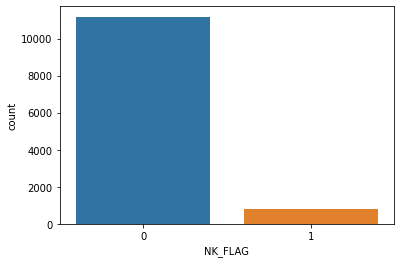

In [105]:

chck = pd.DataFrame()
chck['NK_FLAG'] = y

sns.countplot(chck['NK_FLAG'])

In [106]:
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

D:\Program Files\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

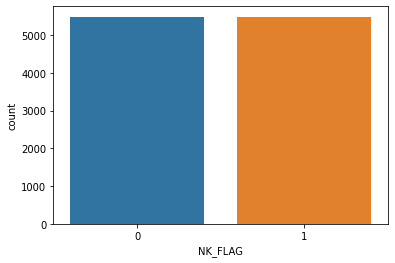

In [107]:

chck = pd.DataFrame()
chck['NK_FLAG'] = y_train

sns.countplot(chck['NK_FLAG'])

In [108]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

98.10396250532595
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2341
           1       0.99      0.97      0.98      2353

    accuracy                           0.98      4694
   macro avg       0.98      0.98      0.98      4694
weighted avg       0.98      0.98      0.98      4694



<AxesSubplot:>

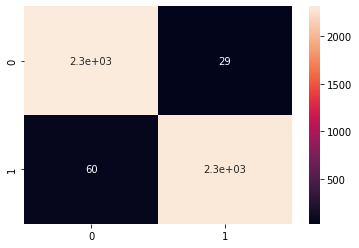

In [109]:
cbc=CatBoostClassifier( n_estimators = 200, max_depth = 5, verbose = 0)
cbc.fit(X_train, y_train)
preds = cbc.predict(X_test)
score = cbc.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

In [110]:
oneHotEncoded_valData = pd.get_dummies(valData, columns = columns_to_encode)

In [111]:
features1 = []
for col in oneHotEncoded_valData.columns:
  if col != 'NK_FLAG':
    features1.append(col)

target1 = 'NK_FLAG'

X_val = oneHotEncoded_valData[features1]
y_val = oneHotEncoded_valData[target1]

In [112]:
X_val = sc.transform(X_val)

96.36666666666667
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2805
           1       0.79      0.61      0.68       195

    accuracy                           0.96      3000
   macro avg       0.88      0.80      0.83      3000
weighted avg       0.96      0.96      0.96      3000



<AxesSubplot:>

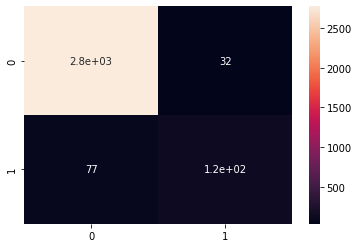

In [127]:
threshold = 0.5
preds = (cbc.predict_proba(X_val)[:,1] >= threshold).astype("int")
score = cbc.score(X_val, y_val)
print(score*100)
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True)

In [79]:
df.shape

(14999, 47)

In [80]:
train_testData.shape

(12000, 47)

In [81]:
valData.shape

(3000, 47)

In [82]:
train_testData1 = train_testData.drop("NK_FLAG",1)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_14308/3538377595.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_testData1 = train_testData.drop("NK_FLAG",1)


In [83]:
valData1 = valData.drop("NK_FLAG",1)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_14308/1842498623.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  valData1 = valData.drop("NK_FLAG",1)


In [84]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X1 = encoder.fit_transform(train_testData1[columns_to_encode]).toarray()   # Assume for simplicity all features are categorical.
# Apply the encoder.
X1_val = encoder.transform(valData1[columns_to_encode]).toarray()

In [85]:
Y1 = train_testData["NK_FLAG"]

In [86]:
Y1_val = valData["NK_FLAG"]

In [87]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [88]:
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

97.65658287175117
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2341
           1       0.99      0.96      0.98      2353

    accuracy                           0.98      4694
   macro avg       0.98      0.98      0.98      4694
weighted avg       0.98      0.98      0.98      4694



<AxesSubplot:>

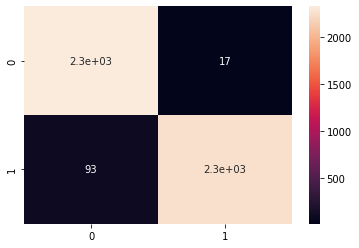

In [89]:
cbc=CatBoostClassifier( n_estimators = 200, max_depth = 5, verbose = 0)
cbc.fit(X_train, y_train)

preds = cbc.predict(X_test)

score = cbc.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

In [90]:
X1_val = sc.transform(X1_val)

95.39999999999999

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2805
           1       0.76      0.43      0.55       195

    accuracy                           0.95      3000
   macro avg       0.86      0.71      0.76      3000
weighted avg       0.95      0.95      0.95      3000



<AxesSubplot:>

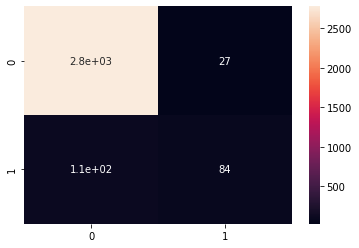

In [91]:
preds = cbc.predict(X1_val)
score = cbc.score(X1_val, Y1_val)
print(score*100)
print()
print(classification_report(Y1_val, preds))

cm = confusion_matrix(Y1_val, preds)
sns
sns.heatmap(cm, annot=True)

In [92]:
importance = pd.read_csv("importance_df.csv")

In [93]:
importance.head(30)

,feature,importance_mean,importance_std,val_imp_0,val_imp_1
0,SOKAK_RISK_SKORU,0.036381,0.004383,0.031998,0.040764
1,TUKETIM_M22_group_240-270,0.025190,0.010327,0.014863,0.035518
2,DEMAND_M1_group_6.0-6.4,0.024724,0.015796,0.008928,0.040519
3,TUKETIM_M2_group_250-275,0.023843,0.000270,0.024113,0.023573
4,TUKETIM_M20_group_700-üzeri,0.023715,0.009747,0.013968,0.033463
5,DEMAND_M2_group_4.95-5.5,0.023229,0.002330,0.020899,0.025558
6,SAYAC_YAS_2.0,0.022700,0.002859,0.019841,0.025558
7,DEMAND_M12_group_EKSIK,0.022286,0.002249,0.020037,0.024534
8,TUKETIM_M21_group_200-225,0.022200,0.009271,0.012929,0.031471
9,TUKETIM_M2_group_0-25,0.022167,0.006341,0.015826,0.028508
